### 1. Load Dataset

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
print(train.shape)
print(train.info())
train.head()

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('data/titanic/test.csv', index_col='PassengerId')
print(test.shape)
print(test.info())
test.head()

(418, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [6]:
train['Age'].value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64

In [7]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### 2. Data Preprocessing

#### 2.1 Encode 성별 
* male : 0, female : 1 변환

In [8]:
combine = [train,test]

In [9]:
for df in combine:
    df.loc[df['Sex'] == 'male','Sex'] = 0
    df.loc[df['Sex'] == 'female','Sex'] = 1

In [11]:
print(train['Sex'].unique())
print(test['Sex'].unique())

[0 1]
[0 1]


In [12]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


#### 2.2 Fill in missing value

In [14]:
train.loc[train['Fare'].isnull(),'Fare']

Series([], Name: Fare, dtype: float64)

In [17]:
test.loc[test['Fare'].isnull(),'Fare']

Series([], Name: Fare, dtype: float64)

In [16]:
test.loc[test['Fare'].isnull(),'Fare'] = 0

#### 2.3 Encode Embarked - One Hot Encoding
* C=0, S=1, Q=2 (X)
* C=[True,False,False], S=[False,True,False], Q=[False,False,True] (O)
* Embarked_C, Embarked_Q, Embarked_S 컬럼을 추가 

In [19]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
for df in combine:
    df['Embarked_C'] = df['Embarked'] == 'C'
    df['Embarked_S'] = df['Embarked'] == 'S'
    df['Embarked_Q'] = df['Embarked'] == 'Q'

In [21]:
train[['Embarked','Embarked_C','Embarked_S','Embarked_Q' ]].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [23]:
test[['Embarked','Embarked_C','Embarked_S','Embarked_Q']].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


In [24]:
train.loc[train['Embarked'].isnull(),['Embarked','Embarked_C','Embarked_S','Embarked_Q']]

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
62,NaN,False,False,False
830,NaN,False,False,False


#### 2.4 Encode Age - null 값을 평균나이로 치환

In [43]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [46]:
for df in combine:
    mean_age = df['Age'].mean()
    df.loc[df['Age'].isnull(),'Age'] = mean_age

In [48]:
train.loc[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,


In [49]:
test.loc[test['Age'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,


### 3. Visualization

In [25]:
%matplotlib inline

In [26]:
import seaborn as sns

#### 3.1 CountPlot (막대그래프)
* x축, y축 중  1개만 설정할 수 있다.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


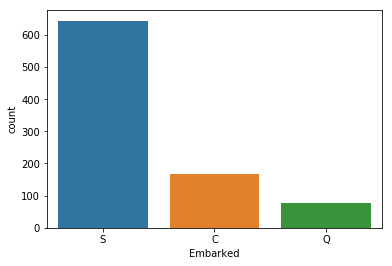

In [28]:
print(train['Embarked'].value_counts())
sns.countplot(data=train, x='Embarked')

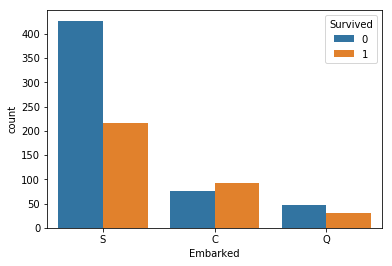

In [29]:
sns.countplot(data=train, x='Embarked', hue='Survived')

In [31]:
train.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64


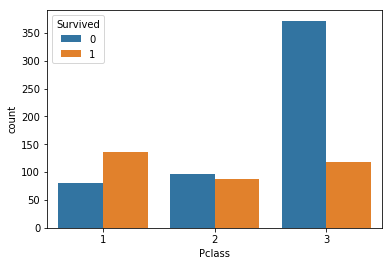

In [30]:
print(train['Pclass'].value_counts())
sns.countplot(data=train, x='Pclass', hue='Survived')

#### 3.2 BarPlot (막대그래프)
* x축, y축 모두 설정 할 수 있다.
* y축은 y의 평균값을 출력해준다.

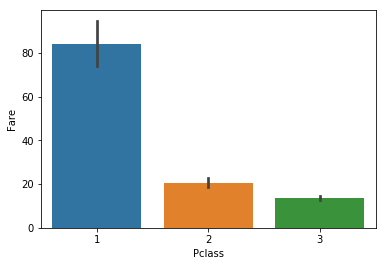

In [32]:
sns.barplot(data=train, x='Pclass', y='Fare')

In [37]:
train.loc[train['Pclass'] == 1,'Fare'].value_counts().reset_index()\
.sort_values(by='index',ascending=False)


,index,Fare
23,512.3292,3
12,263.0000,4
34,262.3750,2
50,247.5208,2
11,227.5250,4
92,221.7792,1
64,211.5000,1
27,211.3375,3
36,164.8667,2
19,153.4625,3


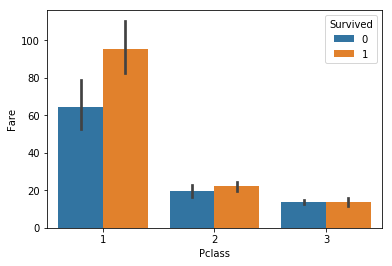

In [38]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

#### 3.3 PointPlot (라인그래프)
* x, y 축 모두 설정할 수 있다.

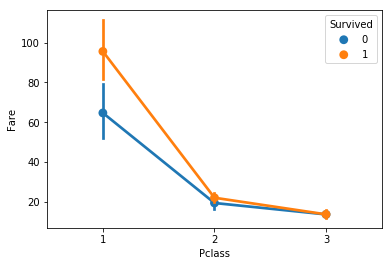

In [39]:
sns.pointplot(data=train, x='Pclass', y='Fare', hue='Survived')

#### 3.4 DistPlot (히스토그램, 분포도)

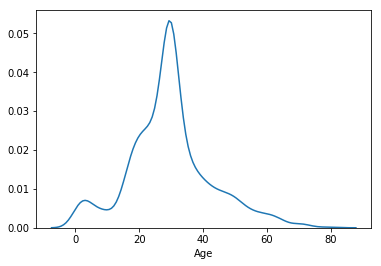

In [50]:
sns.distplot(train['Age'], hist=False)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


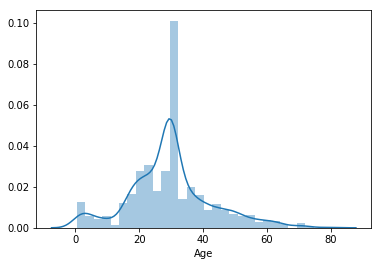

In [51]:
sns.distplot(train['Age'], hist=True)

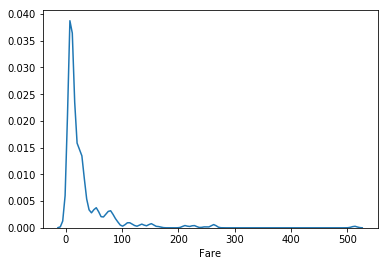

In [53]:
sns.distplot(train['Fare'], hist=False)

(838, 14)


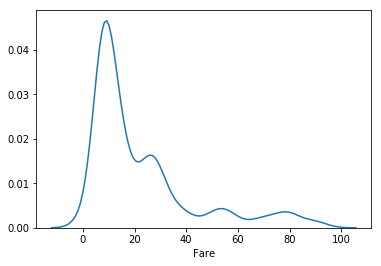

In [55]:
low_fare = train.loc[train['Fare'] < 100]
print(low_fare.shape)
sns.distplot(low_fare['Fare'], hist=False)

#### 3.5 LmPlot (scatter plot, 산점도)

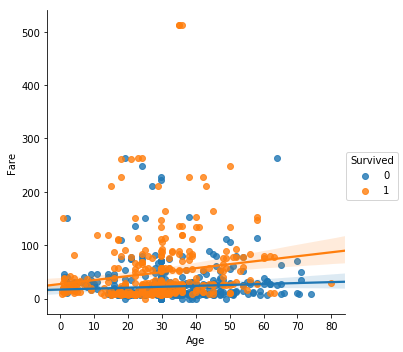

In [56]:
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived')

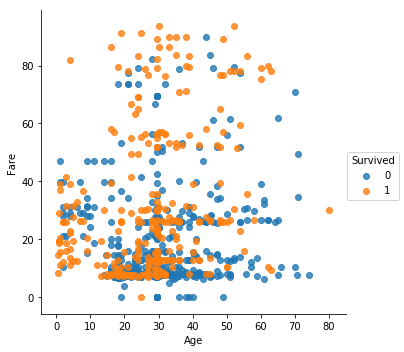

In [58]:
sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived', fit_reg=False)

(813, 14)


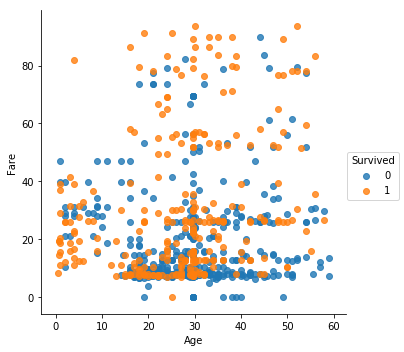

In [60]:
low_fare = low_fare.loc[low_fare['Age'] < 60]
print(low_fare.shape)
sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived', fit_reg=False)

### 4. Training & Predict

#### 4.1 Train

In [61]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q'],
      dtype='object')

In [62]:
feature_names = ['Pclass','Sex','Age','Fare','Embarked_C', 'Embarked_S', 'Embarked_Q']
feature_names

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

In [63]:
#훈련데이터 X_train 생성
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 7)


,Pclass,Sex,Age,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,
1,3,0,22.0,7.2500,False,True,False
2,1,1,38.0,71.2833,True,False,False
3,3,1,26.0,7.9250,False,True,False
4,1,1,35.0,53.1000,False,True,False
5,3,0,35.0,8.0500,False,True,False


In [64]:
#테스트데이터 X_test 생성
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 7)


,Pclass,Sex,Age,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,
892,3,0,34.5,7.8292,False,False,True
893,3,1,47.0,7.0000,False,True,False
894,2,0,62.0,9.6875,False,False,True
895,3,0,27.0,8.6625,False,True,False
896,3,1,22.0,12.2875,False,True,False


In [65]:
#훈련데이터 레이블(답) 생성
y_train = train['Survived']
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### 5. Submission